In [190]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Set pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [191]:
# Import data
movie = pd.read_csv(r'C:\Users\bigba\codingClass\movies_metadata.csv')

C:\Users\bigba\AppData\Local\Temp\ipykernel_13328\3606519181.py:1: DtypeWarning: Columns (0,2,5,10,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie = pd.read_csv(r'C:\Users\bigba\codingClass\movies_metadata.csv')


In [192]:
# Inspect data
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,Release Date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,415665,tt5834036,fr,1:54,Tim is a bit of a loner. At school he gravitat...,2.054256,/hvoJz4vdKBIbHmW8JuWyRQKT3EL.jpg,"[{'name': 'Cinémaginaire Inc.', 'id': 280}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",10/13/2016,0.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,1:54,False,7.4,37.0
1,False,NaN,3500000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,39303,tt1002561,en,2:13,A police profiler has just returned from psych...,0.861213,/UMWgQlB0IGMI15d4EBd70hCCt2.jpg,"[{'name': 'Anthem Pictures', 'id': 23818}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/25/2009,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Killers Are Not Born ... They Are Made,2:13,False,4.6,10.0
2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,269795,tt1131724,en,2:22,A man's life is derailed when an ominous patte...,37.484577,/aQkXOiMi7yBR3XwDbGBzDI2Tqnq.jpg,"[{'name': 'Pandemonium', 'id': 8915}, {'name':...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",6/29/2017,422.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,2:22,False,5.5,277.0
3,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",http://www.222themovie.com/cast2.htm,25038,tt1261041,en,2:22,The plan was easy; the job was not. On a snowy...,5.543966,/78A2buJ6C8vuJpD2cSCU8LA5jZH.jpg,"[{'name': 'Lab4 Productions', 'id': 24093}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",9/24/2008,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The plan was simple... the job was not,2:22,False,5.2,13.0
4,False,NaN,850000,"[{'id': 18, 'name': 'Drama'}]",NaN,2168,tt0472582,en,2:37,"A contemporary, ensemble drama telling the com...",6.558245,/zNBjKJrbrhImgchpV9yPwOImgeR.jpg,"[{'name': 'Kojo Pictures', 'id': 988}, {'name'...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",5/26/2006,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes being young is the toughest job of all.,2:37,False,6.7,50.0


In [193]:
# Inspect shape
movie.shape

(45466, 24)

In [194]:
# Drop rows with less than 500 votes
movie2 = movie[movie['vote_count'] >= 500]

In [195]:
# Inspect new shape
movie2.shape

(2056, 24)

In [199]:
# Drop columns that are unneccessary, filled with mostly null values, or composed of nearly only 1 value
movie3 = movie2.drop(columns = ['adult', 'original_title', 'belongs_to_collection', 'homepage', 'id',
       'imdb_id', 'overview', 'poster_path', 'status', 'tagline', 'video', 'original_language', 'title'])

In [201]:
# Check for nulls
nulls = movie3.isnull().sum()
nulls.sort_values(ascending = False)

budget                  0
genres                  0
popularity              0
production_companies    0
production_countries    0
Release Date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

In [202]:
# import neccessary library
import re

def extract_names(data_string, column_name):
    """Extracts names from a JSON string based on the column name.

    Args:
        data_string: A JSON string representing the data (genres, production companies, etc.).
        column_name: The name of the column (e.g., 'genres', 'production_companies').

    Returns:
        A string containing the names separated by commas.
    """

    # Use regular expression to find all 'name': ' ' patterns
    matches = re.findall(r"'name': '(.*?)'", data_string)

    # Join the extracted names with commas
    return ', '.join(matches)

# Applying the function to multiple columns
columns_to_extract = ['genres', 'production_companies', 'production_countries', 'spoken_languages']

# Iterate through all column names
for column in columns_to_extract:
    movie3[column] = movie3[column].apply(lambda x: extract_names(x, column))

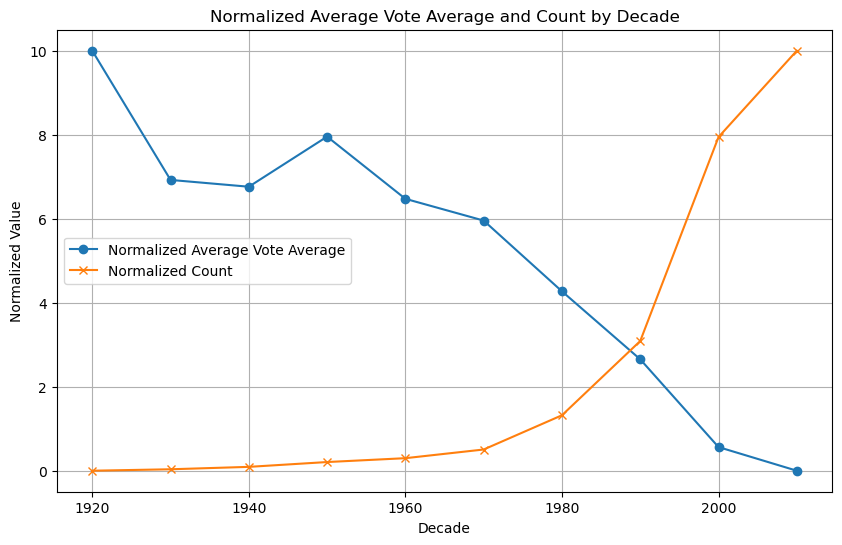

In [203]:
# Convert 'Release Date' to datetime for easier manipulation
movie3['Release Date'] = pd.to_datetime(movie3['Release Date'])

# Extract the decade from the release date
movie3['Decade'] = movie3['Release Date'].dt.year // 10 * 10

# Group by decade and calculate mean vote average and count
grouped_data = movie3.groupby('Decade').agg({'vote_average': ['mean', 'count']})

# Normalize the data
grouped_data['normalized_vote_average'] = (grouped_data['vote_average']['mean'] - grouped_data['vote_average']['mean'].min()) / (grouped_data['vote_average']['mean'].max() - grouped_data['vote_average']['mean'].min()) * 10
grouped_data['normalized_count'] = (grouped_data['vote_average']['count'] - grouped_data['vote_average']['count'].min()) / (grouped_data['vote_average']['count'].max() - grouped_data['vote_average']['count'].min()) * 10

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot the normalized average vote average
plt.plot(grouped_data.index, grouped_data['normalized_vote_average'], label='Normalized Average Vote Average', marker='o')

# Plot the normalized count
plt.plot(grouped_data.index, grouped_data['normalized_count'], label='Normalized Count', marker='x')

# Set the title and labels
plt.title('Normalized Average Vote Average and Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Normalized Value')

# Legend
plt.legend()

# Gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [204]:
# Create a list of date columns to process
date_columns_to_process = ['Release Date']

for column in date_columns_to_process:
    # Convert the column to datetime format
    movie3[column] = pd.to_datetime(movie3[column]) 
    
    # Extract day, month, and year from the date column
    column_name_without_date = column.replace(' Date', '')  # Remove "Date" from the column name
    movie3[f'{column_name_without_date} DOW'] = movie3[column].dt.dayofweek
    movie3[f'{column_name_without_date} Day'] = movie3[column].dt.day
    movie3[f'{column_name_without_date} Month'] = movie3[column].dt.month
    movie3[f'{column_name_without_date} Year'] = movie3[column].dt.year

    # Extract day of the week from the date column and assign to a new column
    movie3[f'{column_name_without_date} DOW'] = movie3[f'{column_name_without_date} DOW'].map({
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    })

    # Map numeric month values to month names
    movie3[f'{column_name_without_date} Month'] = movie3[f'{column_name_without_date} Month'].map({
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    })

    # Change categorical values to Strings
    movie3['Release Day'] = movie3['Release Day'].apply(lambda x: str(x))
    movie3['Release Year'] = movie3['Release Year'].apply(lambda x: str(x))

    # Drop the original date column
    movie3.drop(columns=[column], inplace=True)

In [205]:
# Check out the new dataset
movie3.head()

,budget,genres,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,Decade,Release DOW,Release Day,Release Month,Release Year
25,30000000,"Action, Adventure, Animation, Science Fiction,...",18.502877,"Focus Films, Starz Animation, Relativity Media...",United States of America,48428063.0,79.0,English,6.6,1291.0,2000,Wednesday,19,August,2009
33,35000000,"Drama, Crime",8.33756,"Columbia Pictures, Relativity Media",United States of America,69823199.0,123.0,English,6.5,1406.0,2000,Thursday,27,March,2008
40,40000000,Drama,11.637224,Warner Bros.,United States of America,95020213.0,128.0,,6.8,795.0,2010,Friday,12,April,2013
46,65000000,"Action, Adventure, War",18.108408,"Virtual Studios, Legendary Pictures, Hollywood...",United States of America,422610419.0,117.0,English,7.0,5092.0,2000,Saturday,9,December,2006
50,25000000,"Horror, Thriller",9.196884,"The Weinstein Company, Di Bonaventura Pictures...",United States of America,94679598.0,104.0,English,6.5,1372.0,2000,Thursday,12,July,2007


In [207]:
# Convert budget column to numeric
movie3['budget'] = pd.to_numeric(movie3['budget'], errors='coerce')

In [208]:
# List of columns to be processed
columns_to_process = [
    'genres', 'production_companies', 'production_countries', 'spoken_languages'
]

# Loop through each column, split, one-hot encode, and concatenate
for column in columns_to_process:
    data = movie3[column].str.split(', ', expand=True)
    dummies = pd.get_dummies(data.stack()).groupby(level=0).sum()
    movie3 = pd.concat([movie3, dummies.add_prefix(f'{column} ')], axis=1)

# Drop original categorical columns
movie3 = movie3.drop(columns=columns_to_process)

In [209]:
# Check out the new shape
movie3.shape

(2056, 2563)

In [210]:
# Ensure there are no nulls
null_counts = movie3.isnull().sum().sort_values(ascending = False)
null_counts

budget                                                          0
production_companies ShivHans Pictures                          0
production_companies Pricel                                     0
production_companies Prime Focus                                0
production_companies Prime Universe Productions                 0
                                                               ..
production_companies Gerard Butler Alan Siegel Entertainment    0
production_companies Gerber Pictures                            0
production_companies Ghost House Pictures                       0
production_companies Ghost Ship Films Pty. Ltd.                 0
spoken_languages 한국어/조선말                                        0
Length: 2563, dtype: int64

In [211]:
# Convert all other categorical columns to boolean using one-hot encoding
movie3 = pd.get_dummies(movie3)

# Separate Floats from Booleans
columns_to_round = ['vote_average', 'budget', 'revenue', 'runtime', 'vote_count']

# Round the specified column to 1 decimal place
movie3[columns_to_round] = movie3[columns_to_round].round(1)

# Convert all other columns to integers
movie3.loc[:, ~movie3.columns.isin(columns_to_round)] = movie3.loc[:, ~movie3.columns.isin(columns_to_round)].astype(int)

# Iterate through all column names
for column in movie3.columns:
    # Replace underscores with spaces in the column name for consistency
    new_column_name = column.replace('_', ' ')
    
    # Rename the column with the new name
    movie3.rename(columns={column: new_column_name}, inplace=True)

In [212]:
# Drop boolean values that have less than x number of instances
movie3.drop([col for col, val in movie3.sum().items() if val < 50], axis=1, inplace=True)

In [213]:
# Check out the new shape of the dataset
movie3.shape

(2056, 109)

In [214]:
# Translate some of the column names
movie3 = movie3.rename(columns={
    'spoken languages Pусский': 'spoken languages Russian',
    'spoken languages 日本語': 'spoken languages Japanese',
    'spoken languages 普通话': 'spoken languages Chinese',
    'spoken languages Français': 'spoken languages French',
    'spoken languages Italiano': 'spoken languages Italian',
    'spoken languages Español': 'spoken languages Spanish',
    'spoken language Deutsch': 'spoken languages Dutch',
    'spoken languages Deutsch': 'spoken languages German'
})

In [215]:
# Compute the correlation each column has with the target, rounded to 6 decimal places
correlation = movie3.corr()['vote average'].round(6)
correlation = correlation.drop('vote average')

# Sort the correlation values in descending order
correlation = correlation.sort_values(ascending=False)

# Print the number of rows and columns, along with the correlation
num_rows, num_columns = movie2.shape
print(f"Currently, {num_rows} movies are being analyzed, based on {num_columns} datapoints.")
print()
print(correlation)

Currently, 2056 movies are being analyzed, based on 24 datapoints.

genres Drama                                                   0.358810
vote count                                                     0.329314
runtime                                                        0.309269
genres War                                                     0.124214
genres History                                                 0.115088
spoken languages French                                        0.100186
Release Month December                                         0.099182
spoken languages German                                        0.079707
Release DOW Saturday                                           0.078388
Release Month September                                        0.077060
genres Animation                                               0.076660
production countries United Kingdom                            0.063023
production companies Warner Bros.                              0.057

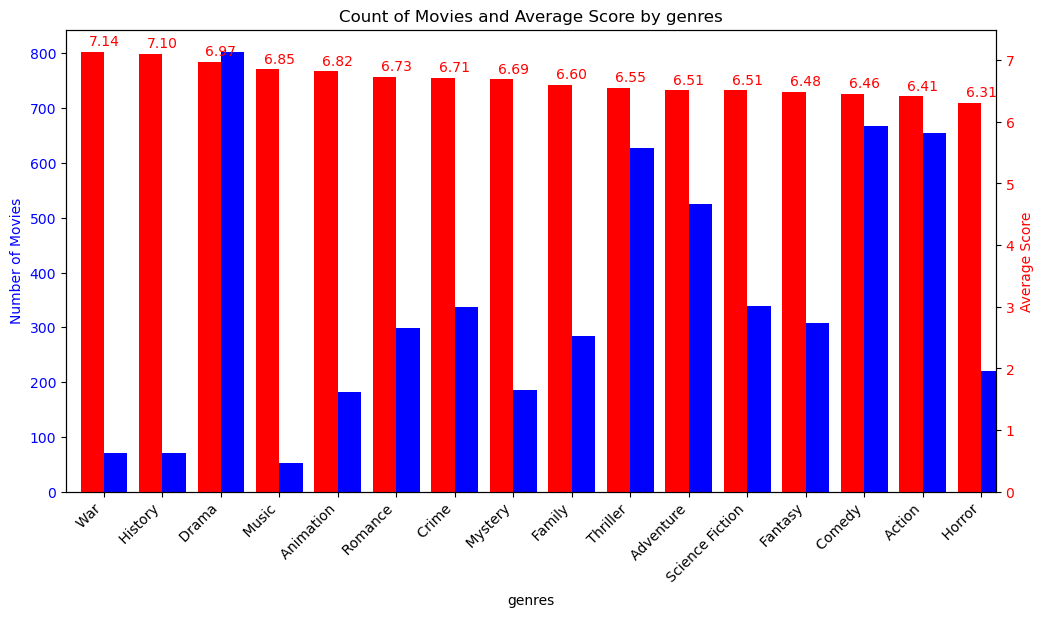

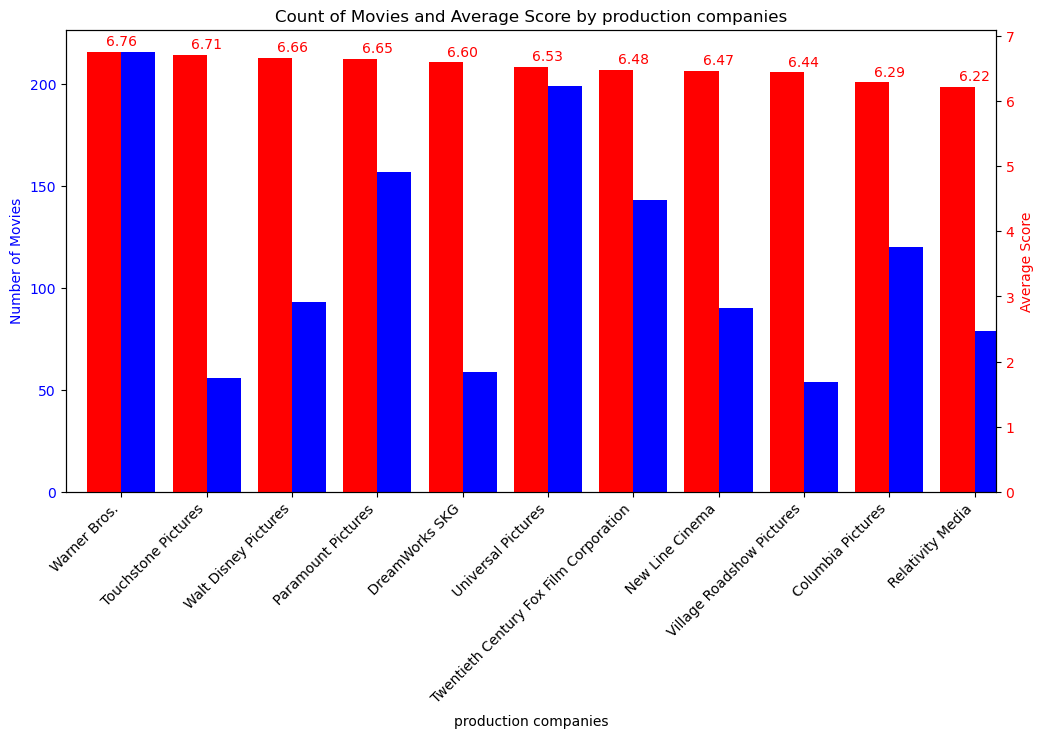

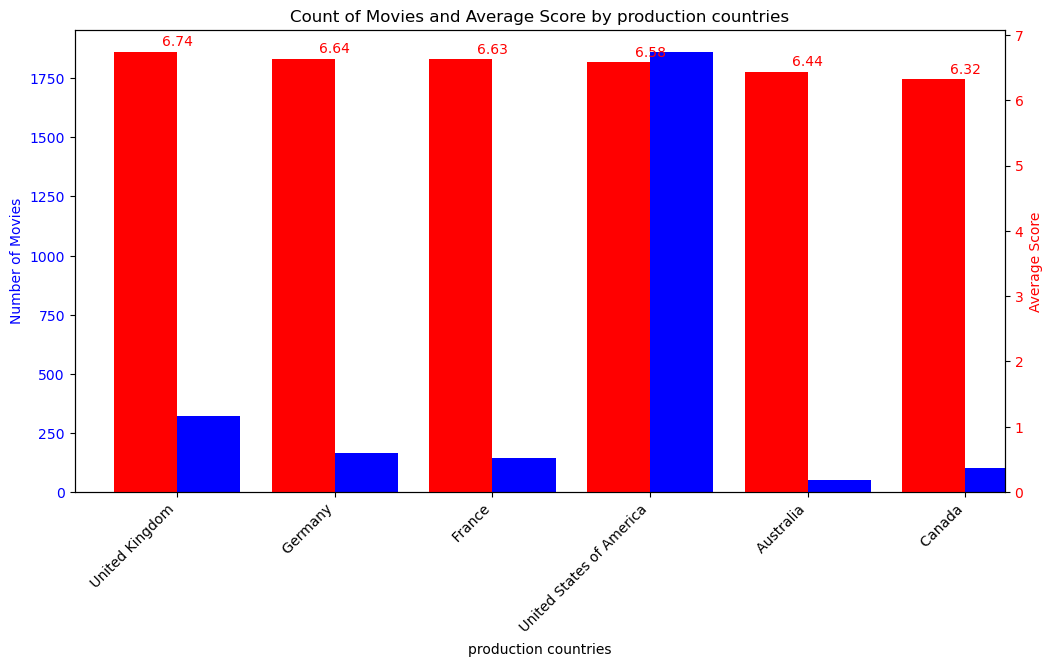

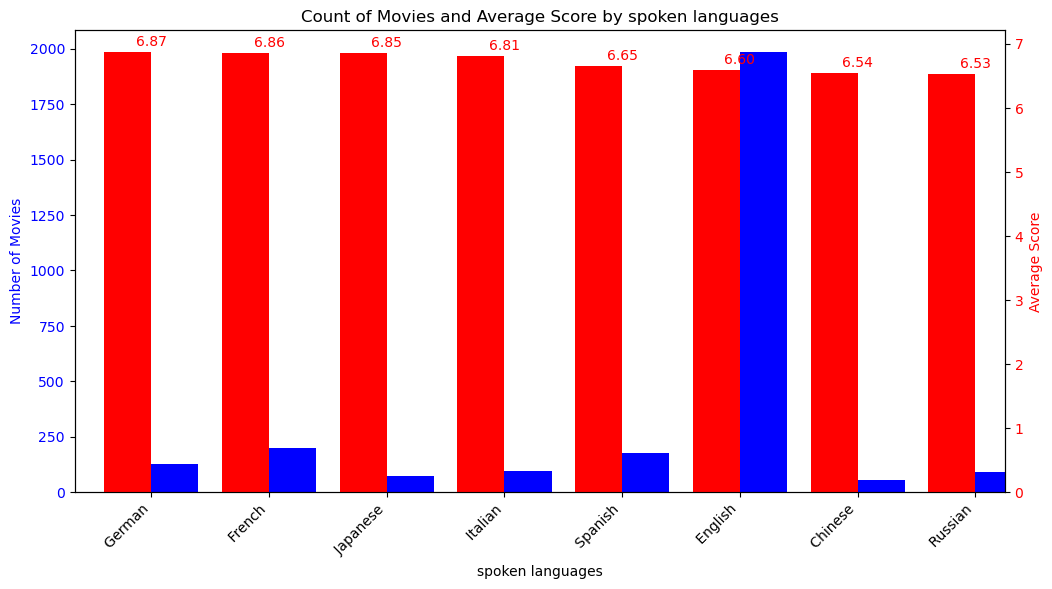

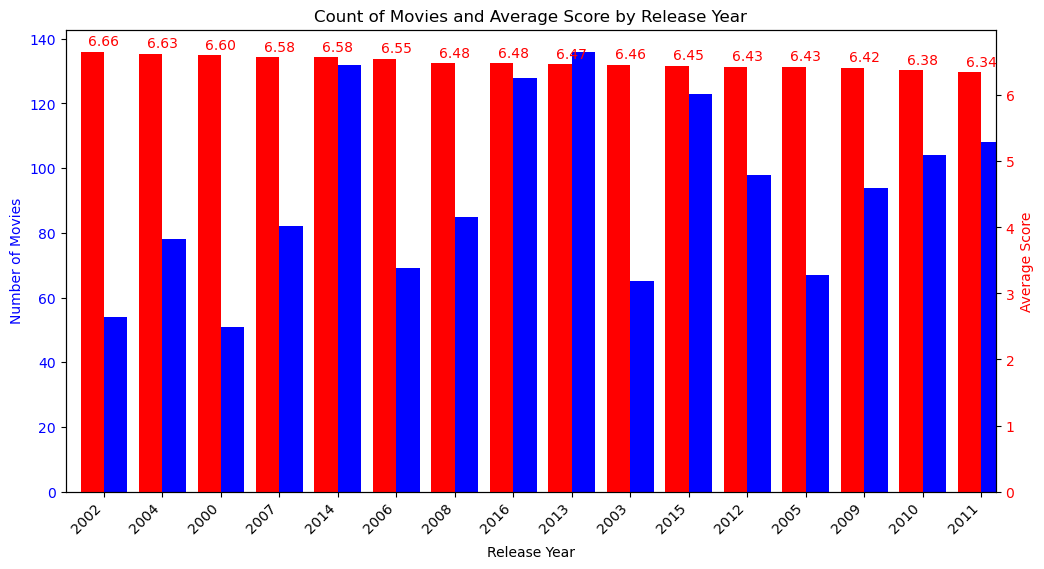

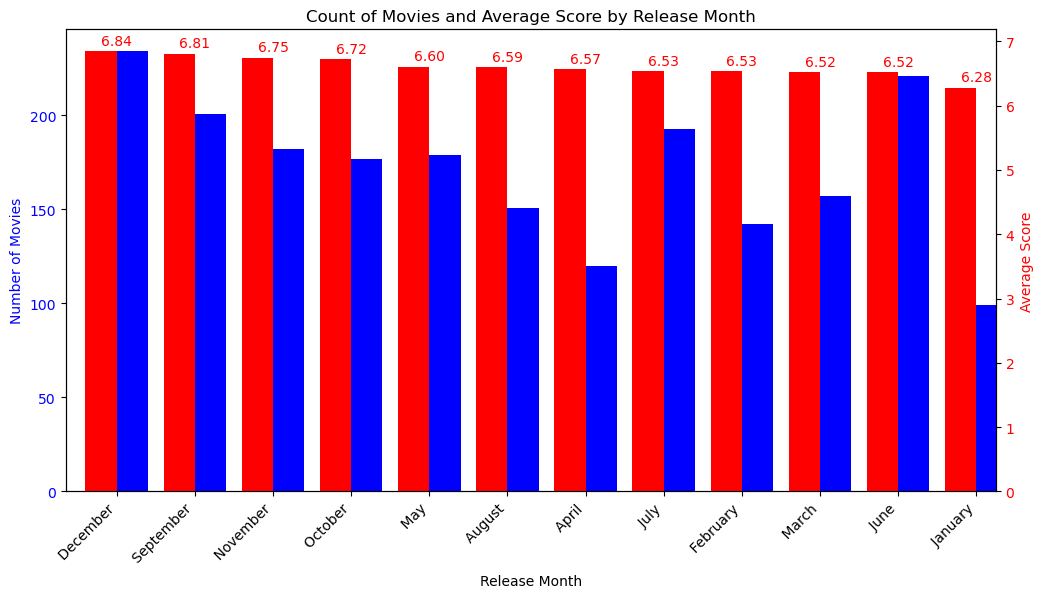

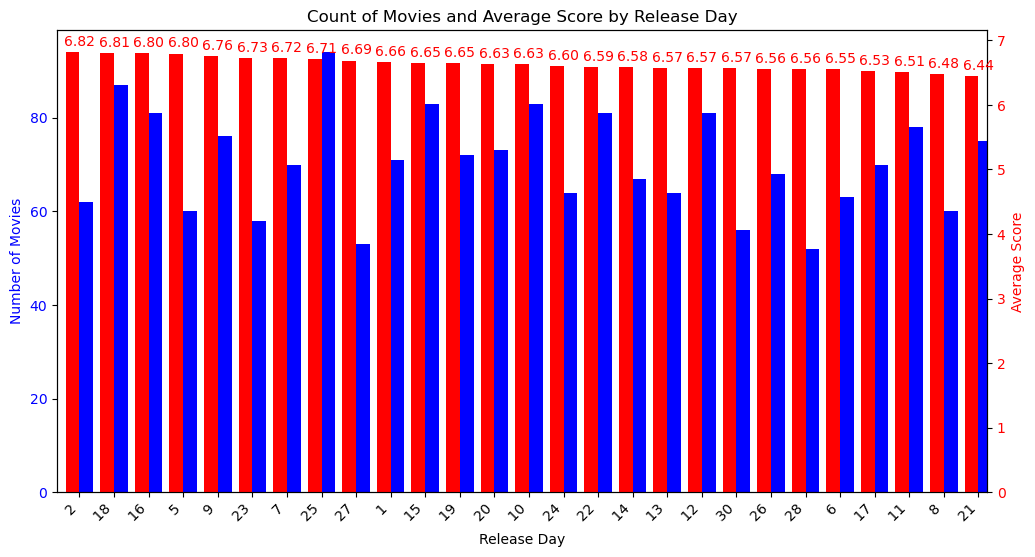

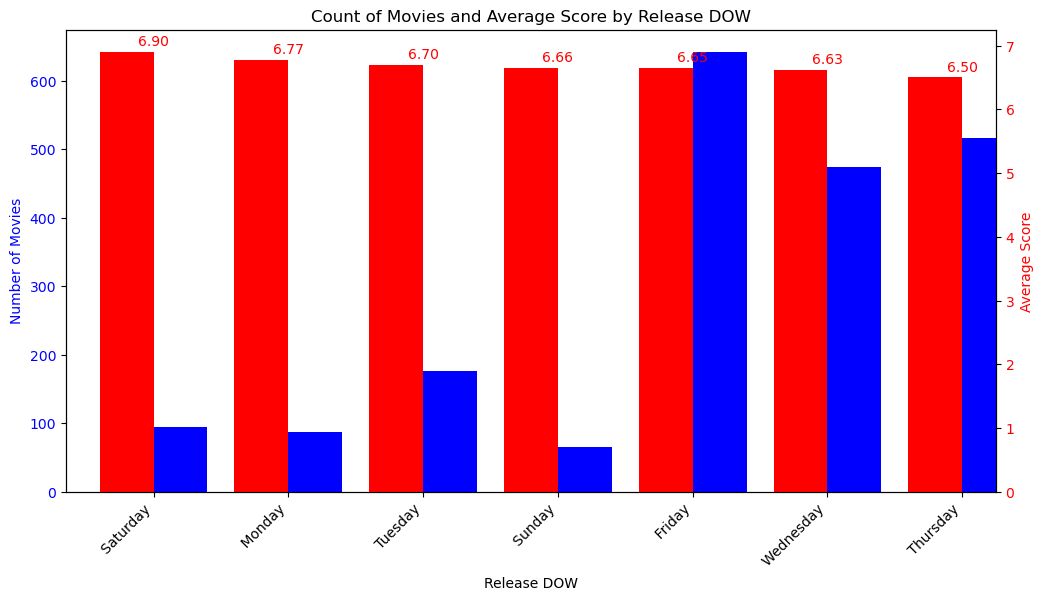

In [216]:
# Function to process the columns and plot the data
def plot_counts_and_avg(movie3, prefix, title, xlabel):
    # Filter the columns that start with the given prefix
    columns = [col for col in movie3.columns if col.startswith(prefix)]
    
    # Sum the values in each column to get the total count
    counts = movie3[columns].sum()

    # Calculate the average "vote average" for each category
    avg_vote = (movie3[columns].multiply(movie3['vote average'], axis="index")).sum() / counts

    # Sort the categories by average vote average
    avg_vote_sorted = avg_vote.sort_values(ascending=False)

    # Re-arrange the counts to match the sorted order
    counts_sorted = counts[avg_vote_sorted.index]

    # Remove the prefix from the labels
    labels = avg_vote_sorted.index.str.replace(prefix, '')

    # Plotting both counts and average vote average
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the count of movies per category (sorted)
    counts_sorted.plot(kind='bar', color='blue', ax=ax1, position=0, width=0.4)
    ax1.set_ylabel('Number of Movies', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis to plot the average vote average (sorted)
    ax2 = ax1.twinx()
    avg_vote_sorted.plot(kind='bar', color='red', ax=ax2, position=1, width=0.4)
    ax2.set_ylabel('Average Score', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add notations for the average score on each bar
    for i in range(len(avg_vote_sorted)):
        ax2.text(i, avg_vote_sorted.iloc[i] + 0.05, f'{avg_vote_sorted.iloc[i]:.2f}', 
                 color='red', ha='center', va='bottom', fontsize=10)

    # Title and labels
    plt.title(title)
    ax1.set_xlabel(xlabel)

    # Update the x-axis labels to remove the prefix
    ax1.set_xticklabels(labels, rotation=45, ha='right')

    # Show the plot
    plt.show()

# Graphing to multiple columns
columns_to_graph = ['genres', 'production companies', 'production countries', 'spoken languages', 'Release Year', 'Release Month', 'Release Day', 'Release DOW']

# Iterate through all column names
for column in columns_to_graph:
    plot_counts_and_avg(movie3, prefix=column, title=f'Count of Movies and Average Score by {column}', xlabel=column)

In [225]:
# Count the number of average votes greater than 74
count_greater_than_74 = (movie3['vote average'] > 7.4).sum()

# Count the total number of average votes
total_votes = movie3['vote average'].count()

# Calculate the percentage
percentage_greater_than_74 = (count_greater_than_74 / total_votes) * 100

# Output the result
print(f"Percentage of movies greater than Enemy at the Gates: {percentage_greater_than_74:.2f}%")

Percentage of movies greater than Enemy at the Gates: 15.27%
